<a href="https://colab.research.google.com/github/Ranjana05b/CreditRisk/blob/main/%3C%3CRanjana%20Bankey%3E%3E%3C%3CProjectID%3E%3EProject_Solution_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task-1: Problem Statement  

Task-2: Data Exploration and Validation

Task-3: Data Cleaning

Task-4: Model Building Simple Models(Logistic Regregression and
Decision trees)

Task-5: Model Validation metrics calculation

Task-6: Handling Class imbalance(Rebuild Simple ML models)

Task-7: Feature Engineering

Task-8: Ensemble Methods - XGB and RF

Task-9: Model presentation

Task-10: Interview questions on the project




# Project Objective
## Background
## Goal, Number of Resources, Business Impact, Time Taken



In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Exploration and Validation


# Download from Github

Create a logionid on github
Upload your file on to github, then use the link here


https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

In [4]:
import pandas as pd
credit_risk_data=pd.read_csv("https://raw.githubusercontent.com/datavedi1/my_datasets/main/credit_risk_data/UCI_Credit_Card.csv")
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Data Exploration

In [5]:
credit_risk_data.shape

(30000, 25)

In [6]:
credit_risk_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'default.payment.next.month'], dtype=object)

## Discrete/Categorical Variables Exploration

In [7]:
credit_risk_data.dtypes

,0
ID,int64
LIMIT_BAL,float64
SEX,int64
EDUCATION,int64
MARRIAGE,int64
AGE,int64
PAY_0,int64
PAY_2,int64
PAY_3,int64
PAY_4,int64


In [10]:
pd.set_option('display.max_columns', None)
credit_risk_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#discrete Variables

## Cat Var1

SEX
2    18112
1    11888
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='SEX'>

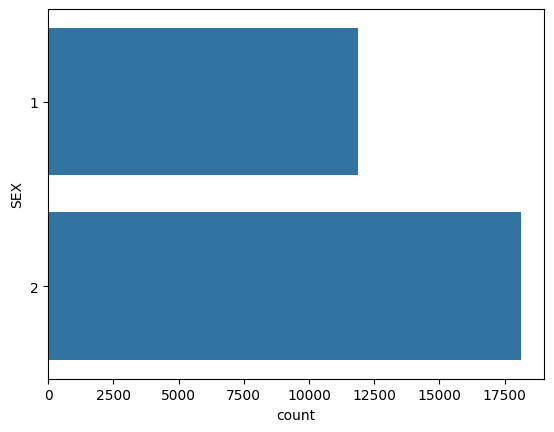

In [18]:
print(credit_risk_data['SEX'].value_counts())
sns.countplot(y="SEX",  data=credit_risk_data)

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='AGE'>

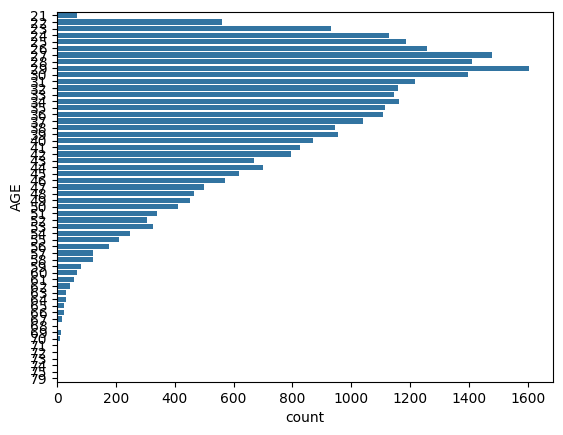

In [16]:
print(credit_risk_data['AGE'].value_counts())
sns.countplot(y="AGE",  data=credit_risk_data)

Findings

## Cat Var2

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='EDUCATION'>

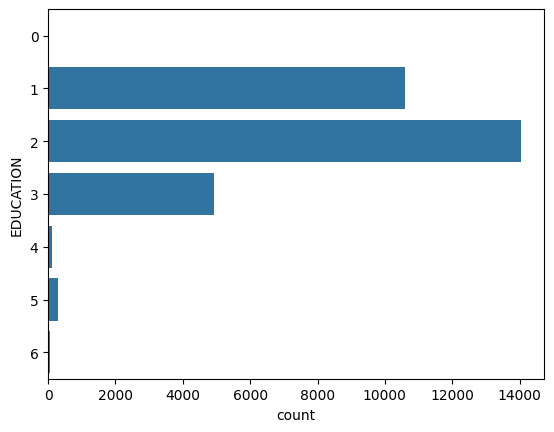

In [17]:
print(credit_risk_data['EDUCATION'].value_counts())
sns.countplot(y="EDUCATION",  data=credit_risk_data)

Findings

## Cat Var3..

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='MARRIAGE'>

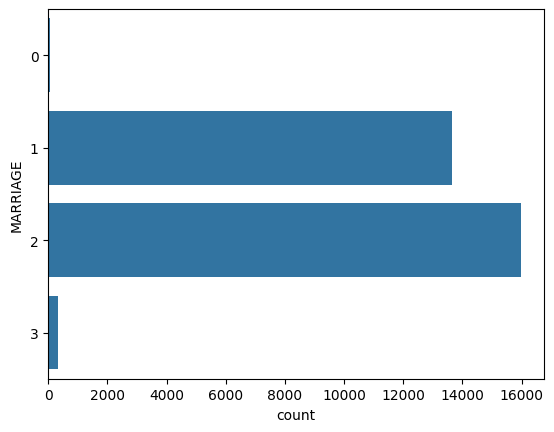

In [20]:
print(credit_risk_data['MARRIAGE'].value_counts())
sns.countplot(y="MARRIAGE",  data=credit_risk_data)

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_0'>

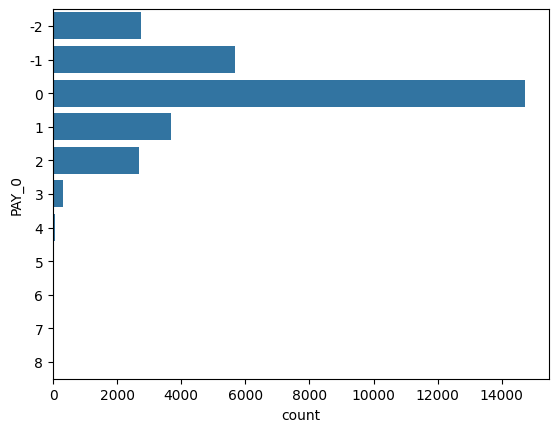

In [21]:
print(credit_risk_data['PAY_0'].value_counts())
sns.countplot(y="PAY_0",  data=credit_risk_data)

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_2'>

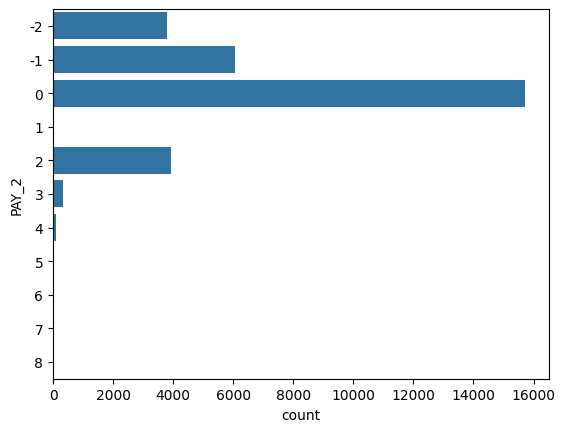

In [22]:
print(credit_risk_data['PAY_2'].value_counts())
sns.countplot(y="PAY_2",  data=credit_risk_data)

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_2'>

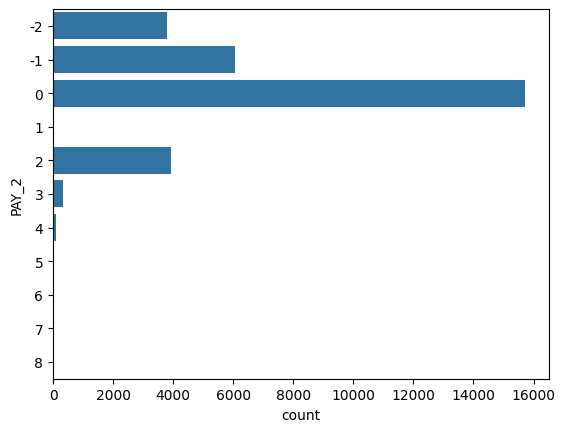

In [23]:
print(credit_risk_data['PAY_2'].value_counts())
sns.countplot(y="PAY_2",  data=credit_risk_data)

Findings

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_3'>

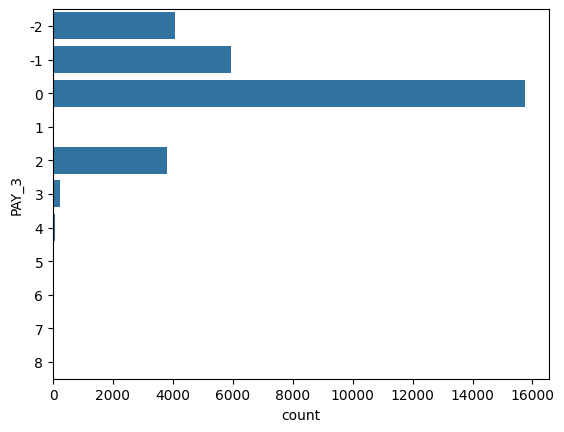

In [24]:
print(credit_risk_data['PAY_3'].value_counts())
sns.countplot(y="PAY_3",  data=credit_risk_data)

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_4'>

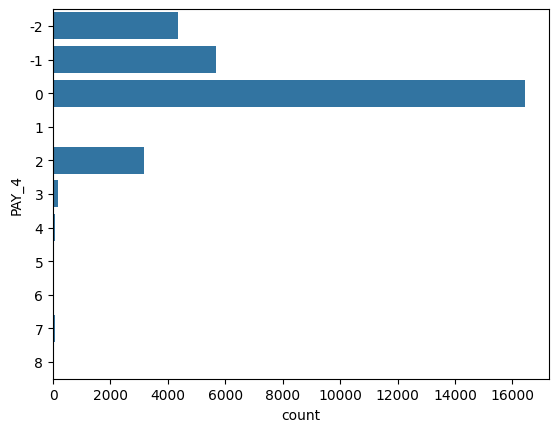

In [25]:
print(credit_risk_data['PAY_4'].value_counts())
sns.countplot(y="PAY_4",  data=credit_risk_data)

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_5'>

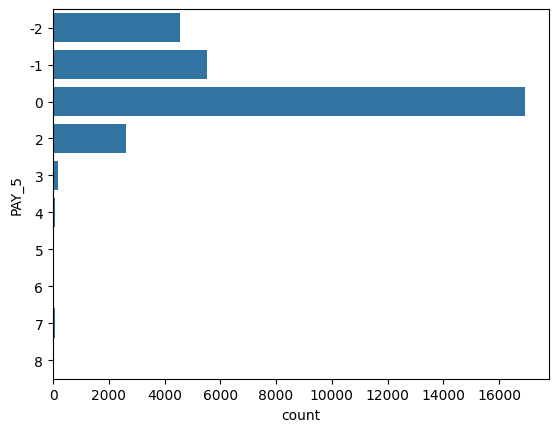

In [26]:
print(credit_risk_data['PAY_5'].value_counts())
sns.countplot(y="PAY_5",  data=credit_risk_data)

PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='PAY_6'>

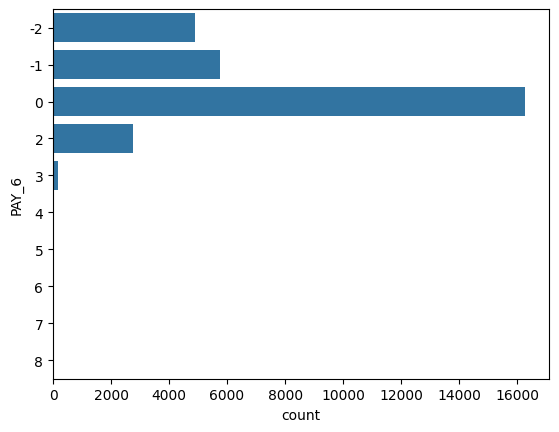

In [27]:
print(credit_risk_data['PAY_6'].value_counts())
sns.countplot(y="PAY_6",  data=credit_risk_data)

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='default.payment.next.month'>

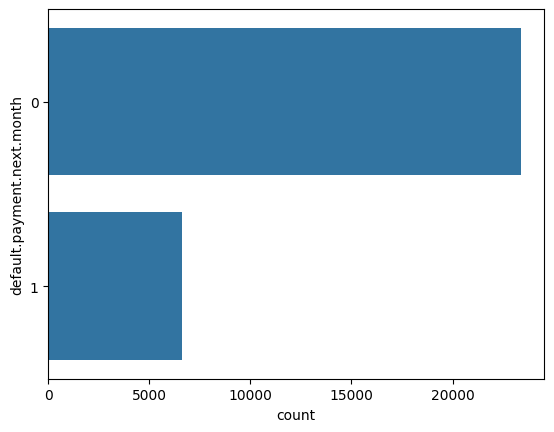

In [28]:
print(credit_risk_data['default.payment.next.month'].value_counts())
sns.countplot(y="default.payment.next.month",  data=credit_risk_data)

## Continuous Variables Exploration

## Continuous Var1

Findings

## Continuous Var2

Findings

## Continuous Var3..

Findings

# Data Cleaning and Data Preparation

## Var1 Cleaning

## Var2 Cleaning

# Model Building
Select the right model, Include Feature Engineering, Perform Model Validation, Multiple models and performance comparison


# Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

# Model  Deployment
## Optional step